## Dataset download

In [1]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils

Cloning into 'Tutorial-Book-Utils'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 45 (delta 18), reused 17 (delta 5), pack-reused 0
Receiving objects: 100% (45/45), 11.62 KiB | 104.00 KiB/s, done.
Resolving deltas: 100% (18/18), done.


In [4]:
!pip install gdown
!python3 Tutorial-Book-Utils/PL_data_loader.py --data FaceMaskDetection

Downloading...
From (original): https://drive.google.com/uc?id=16Gzn1w38yZLJpzmzKcRIRveFeHZtCEr7
From (redirected): https://drive.google.com/uc?id=16Gzn1w38yZLJpzmzKcRIRveFeHZtCEr7&confirm=t&uuid=755c9d15-fa6b-471d-9695-d8366ec43644
To: /Users/zave/Private/dev/learning/ai/computer-vision/object-detection/Face Mask Detection.zip
100%|█████████████████████████████████████████| 417M/417M [12:33<00:00, 553kB/s]
Face Mask Detection.zip download complete!


In [6]:
!unzip -q "Face Mask Detection.zip"

## 데이터셋 확인

In [7]:
!bat ./annotations/maksssksksss307.xml

───────┬────────────────────────────────────────────────────────────────────────
       │ File: ./annotations/maksssksksss307.xml
───────┼────────────────────────────────────────────────────────────────────────
   1   │ 
   2   │ <annotation>
   3   │     <folder>images</folder>
   4   │     <filename>maksssksksss307.png</filename>
   5   │     <size>
   6   │         <width>400</width>
   7   │         <height>226</height>
   8   │         <depth>3</depth>
   9   │     </size>
  10   │     <segmented>0</segmented>
  11   │     <object>
  12   │         <name>mask_weared_incorrect</name>
  13   │         <pose>Unspecified</pose>
  14   │         <truncated>0</truncated>
  15   │         <occluded>0</occluded>
  16   │         <difficult>0</difficult>
  17   │         <bndbox>
  18   │             <xmin>3</xmin>
  19   │             <ymin>65</ymin>
  20   │             <xmax>96</xmax>
  21   │             <ymax>163</ymax>
  22   │         </bndbox>
  23   │     </object>
  24   │     <o

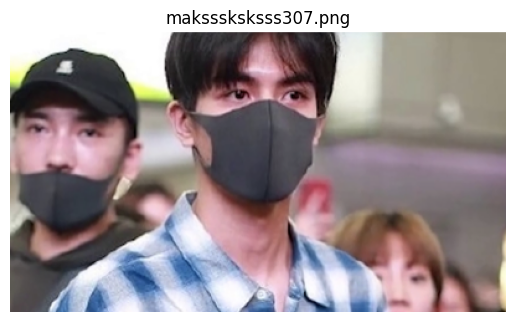

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image = Image.open("./images/maksssksksss307.png")

plt.subplot(1, 1, 1)
plt.title("maksssksksss307.png")
plt.imshow(np.array(image))
plt.axis("off")
plt.show()

## 바운딩 박스 도식화

In [10]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from bs4 import BeautifulSoup

img_list = sorted(glob.glob("images/*"))
annot_list = sorted(glob.glob("annotations/*"))

print(len(img_list))
print(len(annot_list))

853
853


In [11]:
print(img_list[:10])
print(annot_list[:10])

['images/maksssksksss0.png', 'images/maksssksksss1.png', 'images/maksssksksss10.png', 'images/maksssksksss100.png', 'images/maksssksksss101.png', 'images/maksssksksss102.png', 'images/maksssksksss103.png', 'images/maksssksksss104.png', 'images/maksssksksss105.png', 'images/maksssksksss106.png']
['annotations/maksssksksss0.xml', 'annotations/maksssksksss1.xml', 'annotations/maksssksksss10.xml', 'annotations/maksssksksss100.xml', 'annotations/maksssksksss101.xml', 'annotations/maksssksksss102.xml', 'annotations/maksssksksss103.xml', 'annotations/maksssksksss104.xml', 'annotations/maksssksksss105.xml', 'annotations/maksssksksss106.xml']


In [13]:
def generate_box(obj):
    xmin = float(obj.find("xmin").text)
    ymin = float(obj.find("ymin").text)
    xmax = float(obj.find("xmax").text)
    ymax = float(obj.find("ymax").text)

    return [xmin, ymin, xmax, ymax]

def generate_label(obj):
    if obj.find("name").text == "with_mask":
        return 1
    elif obj.find("name").text == "mask_weared_incorrect":
        return 2
    return 0

def generate_target(file):
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels

        return target
    
def plot_image(img_path, annotation):
    
    img = mpimg.imread(img_path)

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation["labels"][idx] == 0:
            rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor="r", facecolor="none")
        elif annotation["labels"][idx] == 1:
            rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor="g", facecolor="none")
        else:
            rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor="orange", facecolor="none")
        
        ax.add_patch(rect)
    
    plt.show()

In [14]:
img_list.index("images/maksssksksss307.png")

232

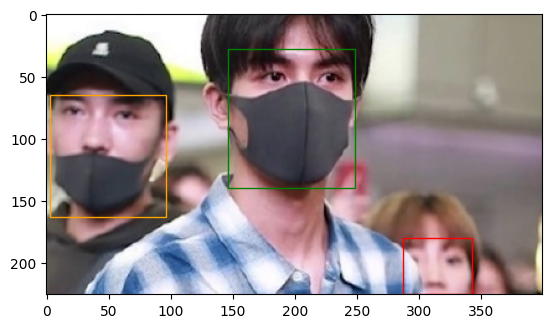

In [15]:
bbox = generate_target(annot_list[232])
plot_image(img_list[232], bbox)